# Dissolved Barium transects and fluxes

# Content
1. [**Import modules & tools**](#Import-modules-&-tools)
1. [**Locations of transects**](#Locations-of-transects)
1. [**Barium transect plots (2002 - 2013 Climatology)**](#Barium-transect-plots-(2002---2013-Climatology))
1. [**Tracer export through Fram Strait/CAA**](#Tracer-export-through-Fram-Strait/CAA)

#Import modules & tools

In [1]:
import sys
sys.path.insert(0, '../../_libs/')
import NEMO_tools as Nts

In [2]:
import glob
import datetime
import scipy.io
import numpy as np
import seaborn as sb
import netCDF4 as nc
import NEMO_tools as Nts
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
% matplotlib inline

/home/yingkai/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
ETOPO2_Arctic=scipy.io.loadmat('../../_libs/ETOPO2_Arctic.mat')
ETOPO2_CAA=scipy.io.loadmat('../../_libs/ETOPO2_CAA.mat')

#print(ETOPO2_Arctic)
lon_arctic=ETOPO2_Arctic['lon_arctic']
lat_arctic=ETOPO2_Arctic['lat_arctic']
topo_arctic=ETOPO2_Arctic['topo_arctic']

res_unit=3
lon_arctic=lon_arctic[0:-1:res_unit, 0:-1:res_unit]
lat_arctic=lat_arctic[0:-1:res_unit, 0:-1:res_unit]
topo_arctic=topo_arctic[0:-1:res_unit, 0:-1:res_unit]*-1 

In [4]:
def unique_continue(x):
    # Has the functionality of numpy.unique but work with "repeated and continued" elements    
    A = np.diff(x)
    head = [0]
    counts = []
    sub_counts = 1
    for i in range(len(A)):
        if A[i] == 0:
            sub_counts += 1
        else:
            counts.insert(len(counts), sub_counts)            
            sub_counts = 1
            head.insert(len(counts), i)
        # deal with the end of an array
        if i == len(A)-1:
            counts.insert(len(counts), sub_counts)            
            sub_counts = 1
            head.insert(len(counts), i)
            
    head_loc = np.array(head)    
    head_loc[1:]=head_loc[1:]+1
    return head_loc, np.array(counts)

In [5]:
from dateutil.relativedelta import relativedelta
base = datetime.datetime(2002, 1, 1)
date_list = [base + relativedelta(months=x) for x in range(144)]

In [6]:
RB=[0.25, 0.41, 0.88]    # Royal blue
AM=[0.90, 0.17, 0.31]    # Amathran
SB=[0.06, 0.05, 0.03]    # Smokey Black
AFB = [0.36, 0.54, 0.66] # Air Force Blue
AG = [0.55, 0.71, 0.0]   # Apple Green
AZ = [0.0, 0.5, 1.0]     # Azure
CB = [0.37, 0.62, 0.63]  # Cadet blue
SP = [1.0, 0.72, 0.77]   # Sakura
CamB = [0.64, 0.76, 0.68]# Cambridge blue
DC = [0.0, 0.55, 0.55]   # Dark cyan
DE = [0.08, 0.38, 0.74]  # Denim
BB = [0.54, 0.81, 0.94]  # Baby blue

# Locations of transects

In [7]:
FName = '/ocean/yingkai/GEOTRACES/Simulations/BARIUM01_1m_20020101_20140103_ptrc_T.nc'

In [196]:
ptrc_obj = nc.Dataset(FName)
nav_lat = ptrc_obj.variables['nav_lat'][:]
nav_lon = ptrc_obj.variables['nav_lon'][:]
deptht = ptrc_obj.variables['deptht'][:]

In [197]:
# lon/lat base info
xgrid = np.array([-0.5, -168.5])
ygrid = np.linspace(60, 90, 200)
lon, lat = np.meshgrid(xgrid, ygrid)
# transects by lon/lat
trans1 = np.vstack([lon[30:, 0], lat[30:, 0]]) # 30
trans2 = np.vstack([lon[20:, 1], lat[20:, 1]])
# project lon/lat into ANHA4 grid
indx1, indy1 = Nts.nearest_search(nav_lon, nav_lat, trans1[0, :], trans1[1, :])
indx2, indy2 = Nts.nearest_search(nav_lon, nav_lat, trans2[0, :], trans2[1, :])
indx3 = np.arange(indx1.max()+1, indx2.min(), 1)
indy3 = np.array([306, 306, 306, 305, 305, 305, 305, 305, 304, 304, 304])
indx_total = np.hstack([indx1, indx3, np.flipud(indx2)])
indy_total = np.hstack([indy1, indy3, np.flipud(indy2)])
# delete repeated elements
head_loc, counts_loc = unique_continue(indx_total*indy_total)
indx = indx_total[head_loc]
indy = indy_total[head_loc]

In [198]:
xgrid = np.array([-0.5, -145])
ygrid = np.linspace(67, 90, 200)
lon, lat = np.meshgrid(xgrid, ygrid)
# transects by lon/lat
transBG = np.vstack([lon[20:, 1], lat[20:, 1]])
indxBG_total, indyBG_total = Nts.nearest_search(nav_lon, nav_lat, transBG[0, :], transBG[1, :])
head_loc, counts_loc = unique_continue(indxBG_total*indyBG_total)
indxBG = indxBG_total[head_loc]
indyBG = indyBG_total[head_loc]

In [199]:
indxFS = np.array([518])
indyFS = np.arange(300, 361, 1)
# xgrid = np.linspace(-24, 16, 200)
# ygrid = np.array([78, 78])
# lon, lat = np.meshgrid(xgrid, ygrid)
# # transects by lon/lat
# transFS = np.vstack([lon[0, :], lat[0, :]])
# indxFS_total, indyFS_total = Nts.nearest_search(nav_lon, nav_lat, transFS[0, :], transFS[1, :])
# head_loc, counts_loc = unique_continue(indxFS_total*indyFS_total)
# indxFS = indxFS_total[head_loc]
# indyFS = indyFS_total[head_loc]

In [200]:
indxBS = np.array([788])
indyBS = np.arange(220, 241, 1)
# xgrid = np.linspace(-172, -166, 50)
# ygrid = np.array([66, 66])
# lon, lat = np.meshgrid(xgrid, ygrid)
# # transects by lon/lat
# transBS = np.vstack([lon[0, :], lat[0, :]])
# indxBS_total, indyBS_total = Nts.nearest_search(nav_lon, nav_lat, transBS[0, :], transBS[1, :])
# head_loc, counts_loc = unique_continue(indxBS_total*indyBS_total)
# indxBS = indxBS_total[head_loc]
# indyBS = indyBS_total[head_loc]

In [201]:
indxBB = np.array([436])
indyBB = np.arange(173, 209, 1)
# xgrid = np.linspace(-63, -52, 200)
# ygrid = np.array([66, 66])
# lon, lat = np.meshgrid(xgrid, ygrid)
# # transects by lon/lat
# transBB = np.vstack([lon[0, :], lat[0, :]])
# indxBB_total, indyBB_total = Nts.nearest_search(nav_lon, nav_lat, transBB[0, :], transBB[1, :])
# head_loc, counts_loc = unique_continue(indxBB_total*indyBB_total)
# indxBB = indxBB_total[head_loc]
# indyBB = indyBB_total[head_loc]

In [212]:
indxBR = np.array([449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461,
                   462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475,
                   476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488,
                   489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505,
                   506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 518])
indyBR = np.array([412, 412, 411, 411, 410, 410, 409, 408, 408, 407, 407, 406, 405,
                   405, 404, 404, 403, 402, 402, 401, 400, 400, 399, 399, 398, 397, 397,
                   396, 395, 395, 394, 393, 393, 392, 391, 391, 390, 389, 389, 388,
                   387, 386, 386, 385, 385, 384, 383, 382, 382, 381, 380, 379, 379, 378, 377, 376, 376,
                   375, 374, 374, 373, 372, 371, 371, 370, 369, 368, 368, 367, 366, 366])

# xgrid = np.array([0, 17])
# ygrid = np.linspace(67, 78, 800)
# lon, lat = np.meshgrid(xgrid, ygrid)
# # transects by lon/lat
# transBR = np.vstack([lon[20:, 1], lat[20:, 1]])
# indxBR_total, indyBR_total = Nts.nearest_search(nav_lon, nav_lat, transBR[0, :], transBR[1, :])
# head_loc, counts_loc = unique_continue(indxBR_total*indyBR_total)
# indxBR = indxBR_total[head_loc]
# indyBR = indyBR_total[head_loc]

In [207]:
xgrid = np.array([0, -75])
ygrid = np.linspace(61, 65, 200)
lon, lat = np.meshgrid(xgrid, ygrid)
# transects by lon/lat
transHD = np.vstack([lon[20:, 1], lat[20:, 1]])
indxHD_total, indyHD_total = Nts.nearest_search(nav_lon, nav_lat, transHD[0, :], transHD[1, :])
head_loc, counts_loc = unique_continue(indxHD_total*indyHD_total)
indxHD = indxHD_total[head_loc]
indyHD = indyHD_total[head_loc]

In [231]:
indyBR[0]

412

In [239]:
UName = sorted(glob.glob('../../_data/MAT files/vozocrtx_by_month/vozocrtx*mat'))
VName = sorted(glob.glob('../../_data/MAT files/vomecrty_by_month/vomecrty*mat'))

UMAT = scipy.io.loadmat(UName[0])
u = UMAT['vozocrtx'][0, :, :]
u[u>1e7] = np.nan
VMAT = scipy.io.loadmat(VName[0])
v = VMAT['vomecrty'][0, :, :]
v[v>1e7] = np.nan

In [242]:
v[778, 225]

-0.059582858691893274

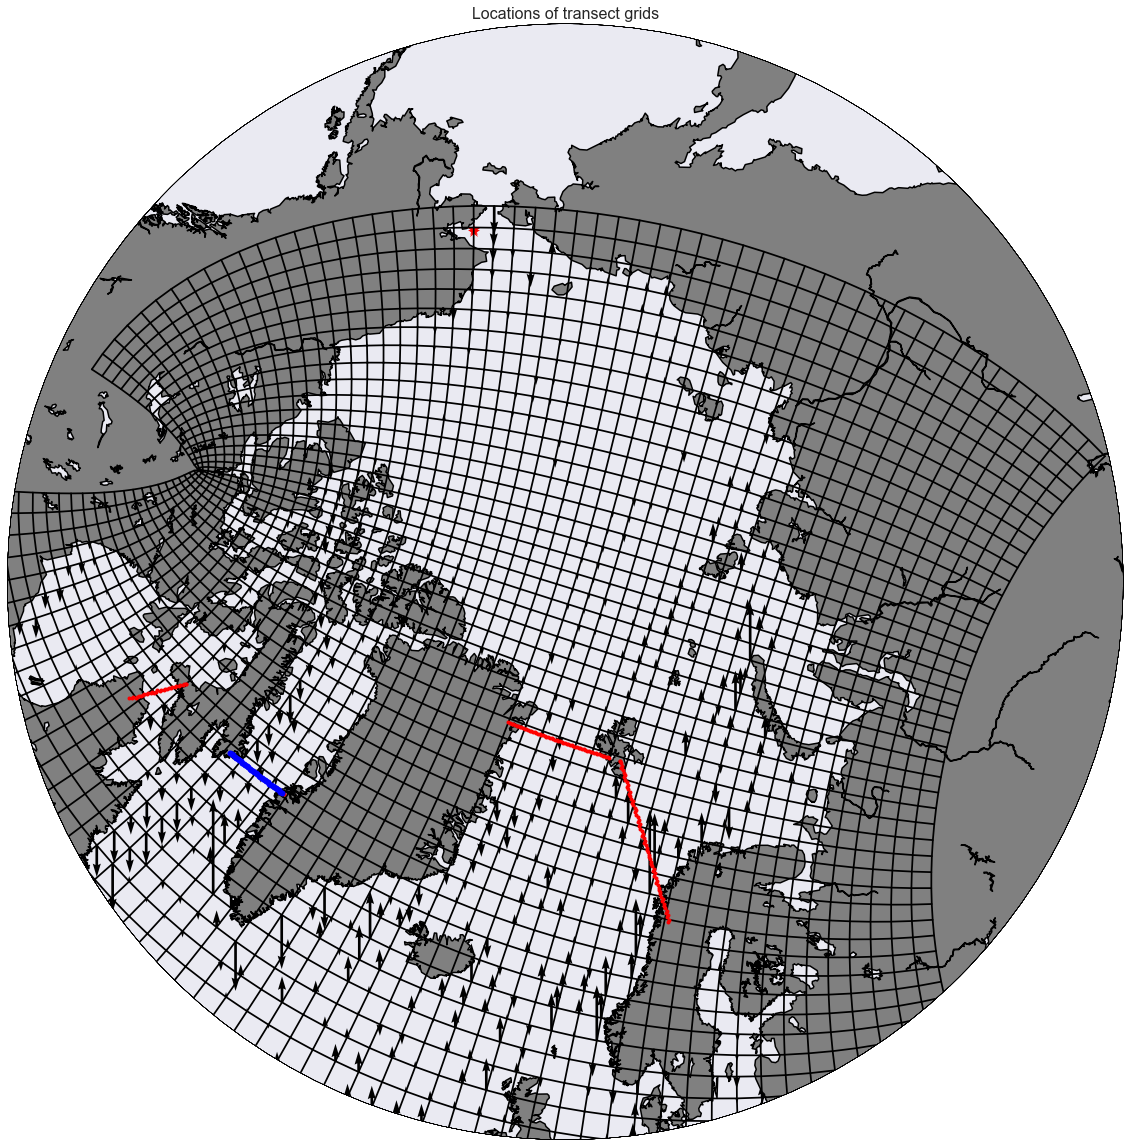

In [241]:
fig = plt.figure(figsize=(20, 20))
ax = fig.gca()
proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=0, round=True, ax=ax)
#proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
# proj = Basemap(resolution='i', projection='lcc',\
#                width=2.5e6, height=2.5e6, \
#                lat_0=76, lat_1=81, lon_0=-40, ax=ax)

proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
proj.drawcoastlines(linewidth=1.5, color='k')
x, y=proj(nav_lon, nav_lat)
#topox, topoy=proj(lon_arctic, lat_arctic)
#proj.contour(topox, topoy, topo_arctic, [1000, 2000], colors=('gray',), linewidths=1.5)
proj.quiver(x[::10, ::10], y[::10, ::10], np.zeros(u[::10, ::10].shape), (v[::10, ::10]), )
proj.plot(x[778, 220], y[778, 220], 'r*', ms=12)
proj.plot(x[778+1, 220], y[778+1, 220], 'r*', ms=12)
proj.plot(x[::10, ::10], y[::10, ::10], 'k-'); proj.plot(x[::10, ::10].T, y[::10, ::10].T, 'k-')
proj.plot(x[indxHD, indyHD], y[indxHD, indyHD], '.r', ms=8)
proj.plot(x[indxBR, indyBR], y[indxBR, indyBR], '.r', ms=8)
proj.plot(x[indxFS, indyFS], y[indxFS, indyFS], '.r', ms=8)
proj.plot(x[indxBB, indyBB], y[indxBB, indyBB], '.r', ms=8)
#proj.plot(x[indxBS, indyBS], y[indxBS, indyBS], '.r', ms=8)
proj.plot(x[436, 173:208], y[436, 173:208], '.b', ms=12)
#proj.plot(x, y, lw=0.25); proj.plot(x.T, y.T, lw=0.25);
ax.set_title('Locations of transect grids', fontsize=16)

In [217]:
save_var = {'indxHD': indxHD, 'indyHD': indyHD, 'indxBB': indxBB, 'indyBB': indyBB,
           'indxFS': indxFS, 'indyFS': indyFS, 'indxBR': indxBR, 'indyBR': indyBR, 'indxBS': indxBS, 'indyBS': indyBS}
scipy.io.savemat('../../_data/MAT files/Ba_trans_index.mat', mdict=save_var)

In [215]:
indyBR

array([412, 412, 411, 411, 410, 410, 409, 408, 408, 407, 407, 406, 405,
       405, 404, 404, 403, 402, 402, 401, 400, 399, 399, 398, 397, 397,
       396, 395, 395, 394, 393, 393, 392, 391, 391, 390, 389, 389, 388,
       387, 386, 385, 384, 383, 382, 382, 381, 380, 379, 378, 377, 376,
       375, 374, 374, 373, 372, 371, 371, 370, 369, 368, 368, 367, 366, 366])

In [87]:
#Ba_trans = np.zeros([144, 50, len(indx)])
#Ba_transBG = np.zeros([144, 50, len(indxBG)])
#Ba_transFS = np.zeros([144, 50, len(indxFS)])
#Ba_transBB = np.zeros([144, 50, len(indxBB)])
#
#for j in range(144):
#    print('time: {}'.format(j))
#    for i in range(len(indx)):
#        Ba_trans[j, :, i] = ptrc_obj.variables['Ba'][j, :, indx[i], indy[i]]
#    for i in range(len(indxBG)):
#        Ba_transBG[j, :, i] = ptrc_obj.variables['Ba'][j, :, indxBG[i], indyBG[i]]
#    for i in range(len(indxFS)):
#        Ba_transFS[j, :, i] = ptrc_obj.variables['Ba'][j, :, indxFS[i], indyFS[i]]
#    for i in range(len(indxBB)):
#        Ba_transBB[j, :, i] = ptrc_obj.variables['Ba'][j, :, indxBB[i], indyBB[i]]

In [33]:
fake_x = np.arange(len(indx))
fake_xgrid, dgrid = np.meshgrid(fake_x, deptht)
fake_xBG = np.arange(len(indxBG))
fake_xgridBG, dgridBG = np.meshgrid(fake_xBG, deptht)
fake_xFS = np.arange(len(indxFS))
fake_xgridFS, dgridFS = np.meshgrid(fake_xFS, deptht)
fake_xBB = np.arange(len(indxBB))
fake_xgridBB, dgridBB = np.meshgrid(fake_xBB, deptht)

In [108]:
#save_var = {'Ba_trans':Ba_trans, 'dgrid':dgrid, 'fake_xgrid':fake_xgrid,
#            'Ba_transBG':Ba_transBG, 'dgridBG':dgridBG, 'fake_xgridBG':fake_xgridBG,
#            'Ba_transFS':Ba_transFS, 'dgridFS':dgridFS, 'fake_xgridFS':fake_xgridFS,
#            'Ba_transBB':Ba_transBB, 'dgridBB':dgridBB, 'fake_xgridBB':fake_xgridBB,           
#           }
#scipy.io.savemat('../../_data/Exchange/Ba_trans.mat', mdict=save_var)

In [35]:
MAT = scipy.io.loadmat('../../_data/Exchange/Ba_trans.mat')
Ba_trans = MAT['Ba_trans']
Ba_transBG = MAT['Ba_transBG']
Ba_transFS = MAT['Ba_transFS']
Ba_transBB = MAT['Ba_transBB']

In [36]:
Ba_trans_mask = np.ma.array(Ba_trans, mask=(Ba_trans==0))
Ba_trans_mean = np.nanmean(Ba_trans_mask, 0)
Ba_grad_mean, _ = np.gradient(Ba_trans_mean)

Ba_trans_2008 = np.nanmean(Ba_trans_mask[74:76], 0)
Ba_grad_2008, _ = np.gradient(Ba_trans_2008)

In [37]:
Ba_transBG_mask = np.ma.array(Ba_transBG, mask=(Ba_transBG==0))
Ba_transBG_mean = np.nanmean(Ba_transBG_mask, 0)
Ba_gradBG_mean, _ = np.gradient(Ba_transBG_mean)

Ba_transBG_2008 = np.nanmean(Ba_transBG_mask[74:76], 0)
Ba_gradBG_2008, _ = np.gradient(Ba_transBG_2008)

In [38]:
Ba_transFS_mask = np.ma.array(Ba_transFS, mask=(Ba_transFS==0))
Ba_transFS_mean = np.nanmean(Ba_transFS_mask, 0)
Ba_gradFS_mean, _ = np.gradient(Ba_transFS_mean)

In [39]:
Ba_transBB_mask = np.ma.array(Ba_transBB, mask=(Ba_transBB==0))
Ba_transBB_mean = np.nanmean(Ba_transBB_mask, 0)
Ba_gradBB_mean, _ = np.gradient(Ba_transBB_mean)

In [40]:
lev1 = np.arange(40, 80, 2)
lev2 = np.arange(36, 76, 2)
lev_grad = np.arange(-6, 7, 1)
sb.set_style('white')

# Barium transect plots (2002 - 2013 Climatology)

## Fram Strait - Bering Strait & Beaufort Gyre

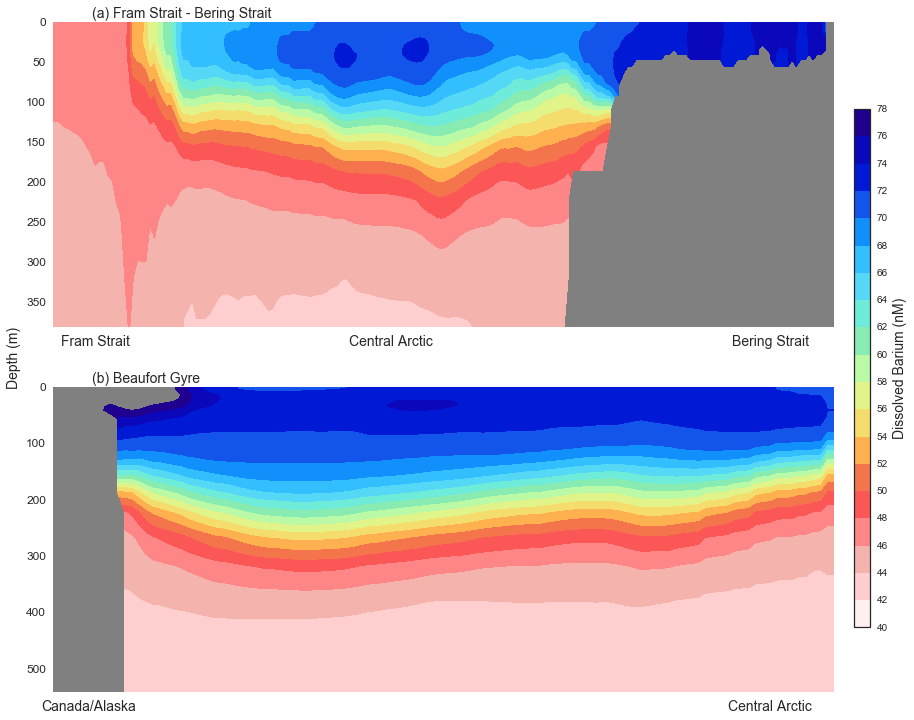

In [41]:
fig = plt.figure(figsize=(14, 12))

ax1 = plt.subplot2grid((2, 1), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((2, 1), (1, 0), colspan=1, rowspan=1)
AX = [ax1, ax2]
for i in range(2):
    AX[i].grid(False)
    AX[i].spines["top"].set_visible(False)
    AX[i].spines["bottom"].set_visible(False) 
    AX[i].spines["right"].set_visible(False)
    AX[i].spines["left"].set_visible(False)
    AX[i].patch.set_color('.5')
    AX[i].invert_yaxis()
    AX[i].yaxis.set_tick_params(labelsize=12)

ax1.set_ylabel('Depth (m)', fontsize=14, y=-0.1)
ax1.set_xticklabels(['Fram Strait', 'Central Arctic', 'Bering Strait'], fontsize=14); ax1.set_xticks([60, 130, 220])
ax1.set_title('(a) Fram Strait - Bering Strait', loc='left', x=0.05, fontsize=14)

ax2.set_xticklabels(['Canada/Alaska', 'Central Arctic'], fontsize=14); ax2.set_xticks([5, 100])
ax2.set_title('(b) Beaufort Gyre', loc='left', x=0.05, fontsize=14)

CS1 = ax1.contourf(fake_xgrid[:30, 50:], dgrid[:30, 50:], Ba_trans_mean[:30, 50:], lev1, cmap=cm.GMT_haxby_r)
CS2 = ax2.contourf(fake_xgridBG[:32, :], dgridBG[:32, :], Ba_transBG_mean[:32, :], lev1, cmap=cm.GMT_haxby_r)

#CS1 = ax1.pcolor(fake_xgrid[:30, 50:], dgrid[:30, 50:], Ba_trans_mean[:30, 50:], vmin=lev1[0], vmax=lev1[-1], cmap=cm.GMT_haxby_r)
#CS2 = ax2.pcolor(fake_xgridBG[:35, :], dgridBG[:35, :], Ba_transBG_mean[:35, :], vmin=lev1[0], vmax=lev1[-1], cmap=cm.GMT_haxby_r)

cax  = fig.add_axes([0.92, 0.2, 0.015, 0.6])
CBar = fig.colorbar(CS1, cax=cax, orientation='vertical')
CBar.set_label('Dissolved Barium (nM)', fontsize=14)
CBar.ax.tick_params(axis='y', length=0)
CBar.set_ticks(lev1)

In [52]:
Ba_transBB_mean.shape

(50, 111)

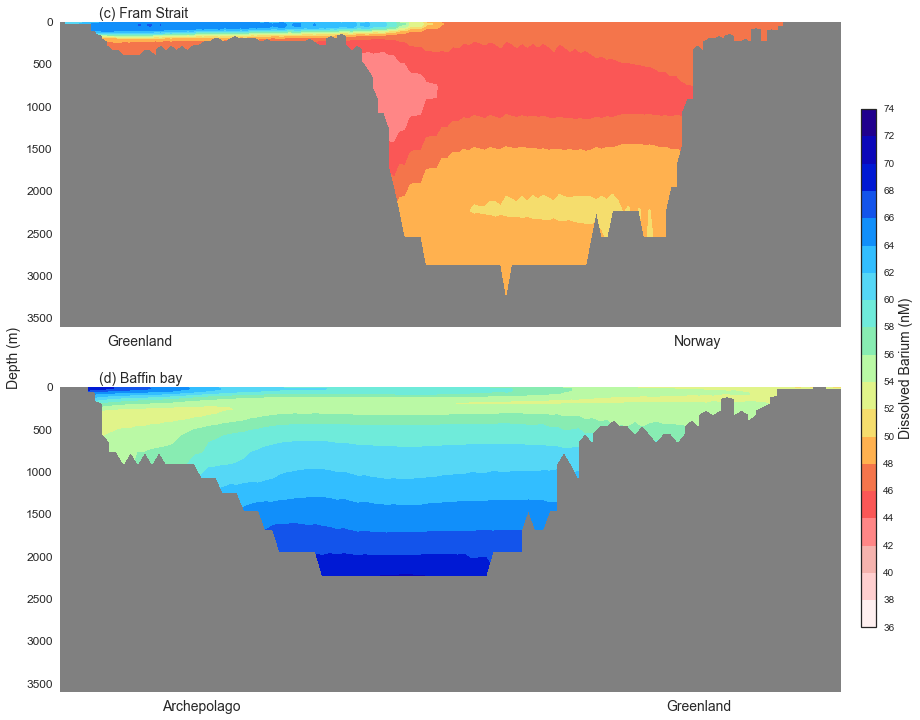

In [53]:
fig = plt.figure(figsize=(14, 12))

ax1 = plt.subplot2grid((2, 1), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((2, 1), (1, 0), colspan=1, rowspan=1)
AX = [ax1, ax2]
for i in range(2):
    AX[i].grid(False)
    AX[i].spines["top"].set_visible(False)
    AX[i].spines["bottom"].set_visible(False) 
    AX[i].spines["right"].set_visible(False)
    AX[i].spines["left"].set_visible(False)
    AX[i].patch.set_color('.5')
    AX[i].invert_yaxis()
    AX[i].yaxis.set_tick_params(labelsize=12)

ax1.set_ylabel('Depth (m)', fontsize=14, y=-0.1)
ax1.set_xticklabels(['Greenland', 'Norway'], fontsize=14); ax1.set_xticks([15, 120])
ax1.set_title('(c) Fram Strait', loc='left', x=0.05, fontsize=14)

ax2.set_xticklabels(['Archepolago', 'Greenland'], fontsize=14); ax2.set_xticks([20, 90])
ax2.set_title('(d) Baffin bay', loc='left', x=0.05, fontsize=14)

CS1 = ax1.contourf(fake_xgridFS[:45, :], dgridFS[:45, :], Ba_transFS_mean[:45, :], lev2, cmap=cm.GMT_haxby_r)
CS2 = ax2.contourf(fake_xgridBB[:45, :], dgridBB[:45, :], Ba_transBB_mean[:45, :], lev2, cmap=cm.GMT_haxby_r)

#CS1 = ax1.pcolor(fake_xgrid[:30, 50:], dgrid[:30, 50:], Ba_trans_mean[:30, 50:], vmin=lev1[0], vmax=lev1[-1], cmap=cm.GMT_haxby_r)
#CS2 = ax2.pcolor(fake_xgridBG[:35, :], dgridBG[:35, :], Ba_transBG_mean[:35, :], vmin=lev1[0], vmax=lev1[-1], cmap=cm.GMT_haxby_r)

cax  = fig.add_axes([0.92, 0.2, 0.015, 0.6])
CBar = fig.colorbar(CS1, cax=cax, orientation='vertical')
CBar.set_label('Dissolved Barium (nM)', fontsize=14)
CBar.ax.tick_params(axis='y', length=0)
CBar.set_ticks(lev2)

## Gradient

In [54]:
#fig = plt.figure(figsize=(14, 12))
#
#ax1 = plt.subplot2grid((2, 1), (0, 0), colspan=1, rowspan=1)
#ax2 = plt.subplot2grid((2, 1), (1, 0), colspan=1, rowspan=1)
#AX = [ax1, ax2]
#for i in range(2):
#    AX[i].grid(False)
#    AX[i].spines["top"].set_visible(False)
#    AX[i].spines["bottom"].set_visible(False) 
#    AX[i].spines["right"].set_visible(False)
#    AX[i].spines["left"].set_visible(False)
#    AX[i].patch.set_color('.5')
#    AX[i].invert_yaxis()
#    AX[i].yaxis.set_tick_params(labelsize=12)
#
#ax1.set_ylabel('Depth (m)', fontsize=14, y=-0.1)
#ax1.set_xticklabels(['Fram Strait', 'Central Arctic', 'Bering Strait'], fontsize=14); ax1.set_xticks([60, 130, 220])
#ax1.set_title('(a) Fram Strait - Bering Strait', loc='left', x=0.05, fontsize=14)
#
#ax2.set_xticklabels(['Canada/Alaska', 'Central Arctic'], fontsize=14); ax2.set_xticks([5, 100])
#ax2.set_title('(b) Beaufort Gyre', loc='left', x=0.05, fontsize=14)
#
#CS1 = ax1.contourf(fake_xgrid[:30, 50:], dgrid[:30, 50:], Ba_grad_mean[:30, 50:], lev_grad, cmap=plt.cm.RdBu_r, extend='both')
#CS2 = ax2.contourf(fake_xgridBG[:32, :], dgridBG[:32, :], Ba_gradBG_mean[:32, :], lev_grad, cmap=plt.cm.RdBu_r, extend='both')
#ax1.contour(fake_xgrid[:30, 50:], dgrid[:30, 50:], Ba_grad_mean[:30, 50:], [0], colors=('k',), linewidths=1.5)
#ax2.contour(fake_xgridBG[:30, :], dgridBG[:30, :], Ba_gradBG_mean[:30, :], [0], colors=('k',), linewidths=1.5)
#
#cax  = fig.add_axes([0.92, 0.2, 0.015, 0.6])
#CBar = fig.colorbar(CS1, cax=cax, orientation='vertical')
#CBar.set_label('Dissolved Barium vertical gradient (nM)', fontsize=14)
#CBar.ax.tick_params(axis='y', length=0)
#CBar.set_ticks(lev_grad)

# Tracer export through Fram Strait/CAA

Basic idea:

$$
F_T = T\iint_S{(n\times \vec{v})\ dxdz} = \sum_{i=0}^n{T_iv_i\Delta x\Delta z}
$$
In ANHA4:
$$
\Delta x = \mathrm{e1t} \\
\Delta z = \mathrm{e3t\_0} \\
v = \mathrm{vomecrty} 
$$

In [55]:
#d1 = 20
#d2 = 27
#print("I set surface layer as above {}m and sub-surface as between {}m and surface layer".format(deptht[d1], deptht[d2]))

In [56]:
coordinate_name=glob.glob('/ocean/yingkai/GEOTRACES/NEMO-CODE/NEMOGCM/CONFIG/ANHA4_OFF/EXP00/mesh_zgr.nc')
coordinate_obj=nc.Dataset(coordinate_name[0])
nav_lon=coordinate_obj.variables['nav_lon'][:]
nav_lat=coordinate_obj.variables['nav_lat'][:]
e1t = coordinate_obj.variables['e1t'][:]
e2t = coordinate_obj.variables['e2t'][:]
e3t = coordinate_obj.variables['e3t_0'][:]

In [57]:
# Delta x, Delta z
deltax_FS = e1t[0, indxFS, indyFS]
deltax_BB = e1t[0, indxBB, indyBB]
deltaz = np.array(e3t[0, :])
meshx_FS, meshz_FS = np.meshgrid(deltax_FS, deltaz)
meshx_BB, meshz_BB = np.meshgrid(deltax_BB, deltaz)
xzFS = meshx_FS*meshz_FS
xzBB = meshx_BB*meshz_BB

In [58]:
# delta y
deltay_FS = e2t[0, indxFS, indyFS]
deltay_BB = e2t[0, indxBB, indyBB]
xyzFS = xzFS*deltay_FS
xyzBB = xzBB*deltay_BB

In [59]:
VName = sorted(glob.glob('../../_data/MAT files/vomecrty_by_month/vomecrty*mat'))

In [105]:
#Ba_fluxFS_n = np.zeros([144, 50, len(indxFS)])
#Ba_fluxFS_s = np.zeros([144, 50, len(indxFS)])
#Ba_fluxBB_n = np.zeros([144, 50, len(indxBB)])
#Ba_fluxBB_s = np.zeros([144, 50, len(indxBB)])
#
#for j in range(144):
#    print('time: {}'.format(j))
#    #
#    MAT = scipy.io.loadmat(VName[j])
#    v_n = MAT['vomecrty'][:, indxFS, indyFS]
#    v_s = MAT['vomecrty'][:, indxFS, indyFS]
#    v_n[v_n>1e7]=np.nan; v_s[v_s>1e7]=np.nan
#    v_n[v_n<0]=0; v_s[v_s>0]=0
#    Ba_fluxFS_n[j, :, :] = Ba_transFS[j, :, :]*v_n
#    Ba_fluxFS_s[j, :, :] = Ba_transFS[j, :, :]*v_s
#    #    
#    v_n = MAT['vomecrty'][:, indxBB, indyBB]
#    v_s = MAT['vomecrty'][:, indxBB, indyBB]
#    v_n[v_n>1e7]=np.nan; v_s[v_s>1e7]=np.nan
#    v_n[v_n<0]=0; v_s[v_s>0]=0
#    Ba_fluxBB_n[j, :, :] = Ba_transBB[j, :, :]*v_n
#    Ba_fluxBB_s[j, :, :] = Ba_transBB[j, :, :]*v_s

In [106]:
#save_var = {'Ba_fluxFS_n':Ba_fluxFS_n, 'Ba_fluxFS_s':Ba_fluxFS_s,
#            'Ba_fluxBB_n':Ba_fluxBB_n, 'Ba_fluxBB_s':Ba_fluxBB_s,      
#           }
#scipy.io.savemat('../../_data/Exchange/Ba_flux.mat', mdict=save_var)

In [62]:
MAT = scipy.io.loadmat('../../_data/Exchange/Ba_flux.mat')
Ba_fluxFS_n = MAT['Ba_fluxFS_n'][:]
Ba_fluxFS_s = MAT['Ba_fluxFS_s'][:]
Ba_fluxBB_n = MAT['Ba_fluxBB_n'][:]
Ba_fluxBB_s = MAT['Ba_fluxBB_s'][:]

Ba_fluxFS = Ba_fluxFS_n+Ba_fluxFS_s
Ba_fluxBB = Ba_fluxBB_n+Ba_fluxBB_s

In [63]:
Ba_fluxFS_mean = np.nanmean(Ba_fluxFS, 0)
Ba_fluxBB_mean = np.nanmean(Ba_fluxBB, 0)

/home/yingkai/anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


## The transport of tracer ($\mathsf{nM\cdot m\cdot s^{-1}}$)

$$
TS = \sum{Ba\cdot v}
$$

In [64]:
lev_flux = np.array([-9, -7, -5, -3, -1, 1, 3, 5, 7, 9])

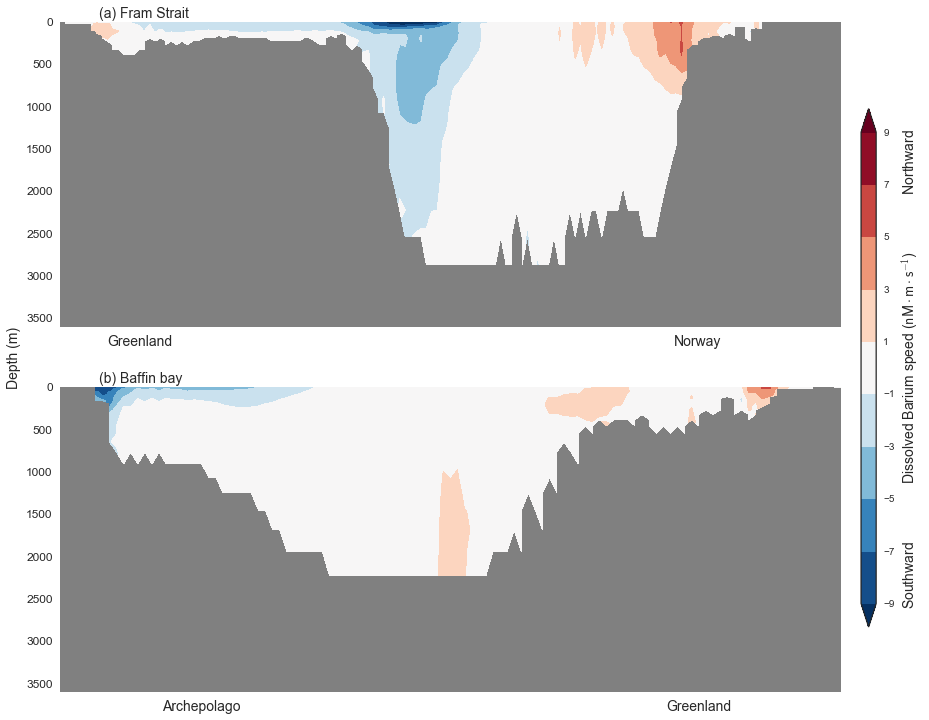

In [65]:
fig = plt.figure(figsize=(14, 12))

ax1 = plt.subplot2grid((2, 1), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((2, 1), (1, 0), colspan=1, rowspan=1)
AX = [ax1, ax2]
for i in range(2):
    AX[i].grid(False)
    AX[i].spines["top"].set_visible(False)
    AX[i].spines["bottom"].set_visible(False) 
    AX[i].spines["right"].set_visible(False)
    AX[i].spines["left"].set_visible(False)
    AX[i].patch.set_color('.5')
    AX[i].invert_yaxis()
    AX[i].yaxis.set_tick_params(labelsize=12)

ax1.set_ylabel('Depth (m)', fontsize=14, y=-0.1)
ax1.set_xticklabels(['Greenland', 'Norway'], fontsize=14); ax1.set_xticks([15, 120])
ax1.set_title('(a) Fram Strait', loc='left', x=0.05, fontsize=14)

ax2.set_xticklabels(['Archepolago', 'Greenland'], fontsize=14); ax2.set_xticks([20, 90])
ax2.set_title('(b) Baffin bay', loc='left', x=0.05, fontsize=14)

CS1 = ax1.contourf(fake_xgridFS[:45, :], dgridFS[:45, :], Ba_fluxFS_mean[:45, :], lev_flux, cmap=plt.cm.RdBu_r, extend='both')
CS2 = ax2.contourf(fake_xgridBB[:45, :], dgridBB[:45, :], Ba_fluxBB_mean[:45, :], lev_flux, cmap=plt.cm.RdBu_r, extend='both')

cax  = fig.add_axes([0.92, 0.2, 0.015, 0.6])
CBar = fig.colorbar(CS1, cax=cax, orientation='vertical')
CBar.set_label('Southward\t\tDissolved Barium speed ($\mathsf{nM\cdot m\cdot s^{-1}}$)\t\tNorthward', fontsize=14)
CBar.ax.tick_params(axis='y', length=0)
CBar.set_ticks(lev_flux)

## Tracer flux (?) ($\mathsf{nM\cdot m^3\cdot s^{-1}}$)

$$
TF = \sum{Ba\cdot v\Delta x \Delta z}
$$

In [67]:
lev_flux2 = lev_flux*5e5

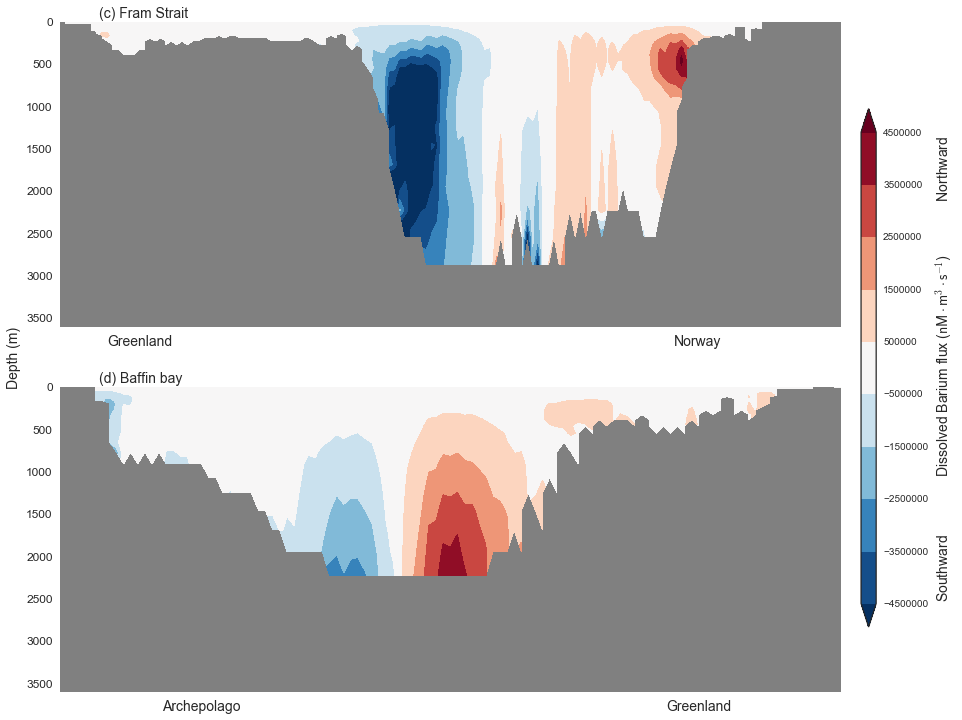

In [68]:
fig = plt.figure(figsize=(14, 12))

ax1 = plt.subplot2grid((2, 1), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((2, 1), (1, 0), colspan=1, rowspan=1)
AX = [ax1, ax2]
for i in range(2):
    AX[i].grid(False)
    AX[i].spines["top"].set_visible(False)
    AX[i].spines["bottom"].set_visible(False) 
    AX[i].spines["right"].set_visible(False)
    AX[i].spines["left"].set_visible(False)
    AX[i].patch.set_color('.5')
    AX[i].invert_yaxis()
    AX[i].yaxis.set_tick_params(labelsize=12)

ax1.set_ylabel('Depth (m)', fontsize=14, y=-0.1)
ax1.set_xticklabels(['Greenland', 'Norway'], fontsize=14); ax1.set_xticks([15, 120])
ax1.set_title('(c) Fram Strait', loc='left', x=0.05, fontsize=14)

ax2.set_xticklabels(['Archepolago', 'Greenland'], fontsize=14); ax2.set_xticks([20, 90])
ax2.set_title('(d) Baffin bay', loc='left', x=0.05, fontsize=14)

CS1 = ax1.contourf(fake_xgridFS[:45, :], dgridFS[:45, :], Ba_fluxFS_mean[:45, :]*xzFS[:45, :], lev_flux2, cmap=plt.cm.RdBu_r, extend='both')
CS2 = ax2.contourf(fake_xgridBB[:45, :], dgridBB[:45, :], Ba_fluxBB_mean[:45, :]*xzBB[:45, :], lev_flux2, cmap=plt.cm.RdBu_r, extend='both')

cax  = fig.add_axes([0.92, 0.2, 0.015, 0.6])
CBar = fig.colorbar(CS1, cax=cax, orientation='vertical')
CBar.set_label('Southward\t\tDissolved Barium flux ($\mathsf{nM\cdot m^3\cdot s^{-1}}$)\t\tNorthward', fontsize=14)
CBar.ax.tick_params(axis='y', length=0)
CBar.set_ticks(lev_flux2)

In [69]:
#fig = plt.figure(figsize=(14, 12))
#ax1 = plt.subplot2grid((2, 1), (0, 0), colspan=1, rowspan=1)
#ax2 = plt.subplot2grid((2, 1), (1, 0), colspan=1, rowspan=1)
#CS1 = ax1.contourf(fake_xgridFS[:45, :], dgridFS[:45, :], Ba_fluxFS_mean[:45, :]*xzFS[:45, :]/xyzFS[:45, :], lev_flux3, cmap=plt.cm.RdBu_r, extend='both')
#CS2 = ax2.contourf(fake_xgridBB[:34, 30:], dgridBB[:34, 30:], Ba_fluxBB_mean[:34, 30:]*xzBB[:34, 30:]/xyzBB[:34, 30:], lev_flux3, cmap=plt.cm.RdBu_r, extend='both')

In [82]:
# Tracer Speed
TS_FS_n = np.nansum(np.nansum(Ba_fluxFS_n[:, :20, :], 1), 1)
TS_FS_s = np.nansum(np.nansum(Ba_fluxFS_s[:, :20, :], 1), 1)
TS_BB_n = np.nansum(np.nansum(Ba_fluxBB_n[:, :20, :], 1), 1)
TS_BB_s = np.nansum(np.nansum(Ba_fluxBB_s[:, :20, :], 1), 1)
# Tracer Flux
TF_FS_n = np.nansum(np.nansum(Ba_fluxFS_n[:, :20, :]*xzFS[:20, :], 1), 1)
TF_FS_s = np.nansum(np.nansum(Ba_fluxFS_s[:, :20, :]*xzFS[:20, :], 1), 1)
TF_BB_n = np.nansum(np.nansum(Ba_fluxBB_n[:, :20, :]*xzBB[:20, :], 1), 1)
TF_BB_s = np.nansum(np.nansum(Ba_fluxBB_s[:, :20, :]*xzBB[:20, :], 1), 1)
# Tracer transport
TT_FS_n = np.nansum(np.nansum(Ba_fluxFS_n[:, :20, :]*xzFS[:20, :]/xyzFS[:20, :], 1), 1)
TT_FS_s = np.nansum(np.nansum(Ba_fluxFS_s[:, :20, :]*xzFS[:20, :]/xyzFS[:20, :], 1), 1)
TT_BB_n = np.nansum(np.nansum(Ba_fluxBB_n[:, :20, :]*xzBB[:20, :]/xyzBB[:20, :], 1), 1)
TT_BB_s = np.nansum(np.nansum(Ba_fluxBB_s[:, :20, :]*xzBB[:20, :]/xyzBB[:20, :], 1), 1)
# Tracer flux density
TFD_FS_n = np.nansum(np.nansum(Ba_fluxFS_n[:, :20, :]/xzFS[:20, :], 1), 1)
TFD_FS_s = np.nansum(np.nansum(Ba_fluxFS_s[:, :20, :]/xzFS[:20, :], 1), 1)
TFD_BB_n = np.nansum(np.nansum(Ba_fluxBB_n[:, :20, :]/xzBB[:20, :], 1), 1)
TFD_BB_s = np.nansum(np.nansum(Ba_fluxBB_s[:, :20, :]/xzBB[:20, :], 1), 1)

** 4 parameters normalized in 1 figure (Fram Strait southward)**

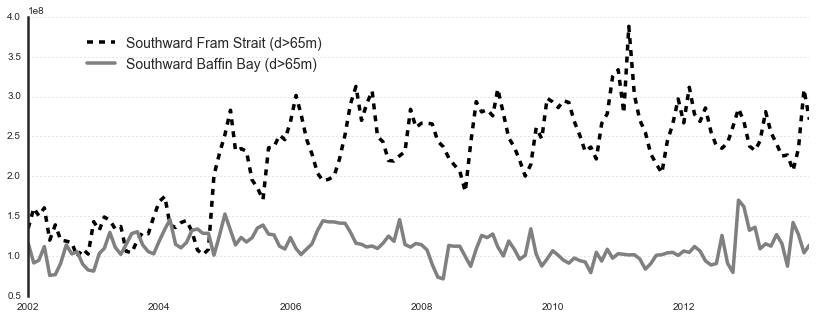

In [103]:
fig = plt.figure(figsize=(14, 5))
ax = fig.gca()

ax.grid(linestyle=':')
ax.xaxis.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False) 
ax.spines["right"].set_visible(False)
ax.set_xlim([date_list[0], date_list[143]])
[i.set_linewidth(2.5) for i in ax.spines.itervalues()] 
ax.tick_params(axis="both", which="both", bottom="off", top="off",    
            labelbottom="on", left="off", right="off", labelleft="on")



ax.plot(date_list, np.abs(TF_FS_s), '--', color='k', lw=3.5, label='Southward Fram Strait (d>65m)')
ax.plot(date_list, np.abs(TF_BB_s), '-', color='gray', lw=3.5, label='Southward Baffin Bay (d>65m)')

LG=ax.legend(bbox_to_anchor=(0.05, 1), loc=2, borderaxespad=1, prop={'size':14})

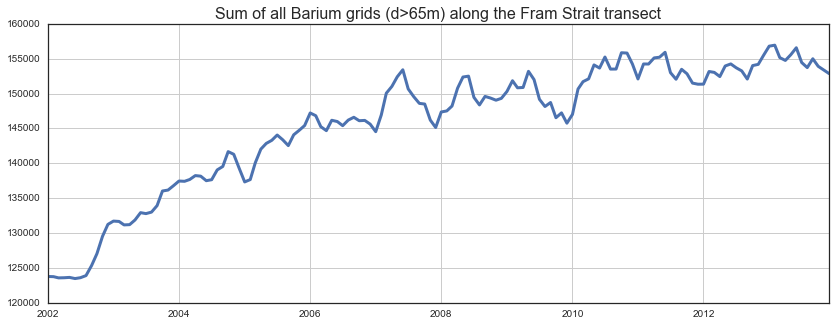

In [115]:
fig = plt.figure(figsize=(14, 5))
ax = fig.gca()
ax.grid()
ax.plot(date_list, np.nansum(np.nansum(Ba_transFS[:, :20, :], 1), 1), linewidth=3)
ax.set_title('Sum of all Barium grids (d>65m) along the Fram Strait transect', fontsize=16)

In [72]:
save_var = {'Ba_fluxFS_n':Ba_fluxFS_n,            'Ba_fluxFS_s':Ba_fluxFS_s,
            'Ba_fluxBB_n':Ba_fluxBB_n[:, :, 30:], 'Ba_fluxBB_s':Ba_fluxBB_s[:, :, 30:],
            'xzFS': xzFS, 'xzBB': xzBB[:, 30:],
            'fake_xgridFS':fake_xgridFS, 'dgridFS':dgridFS,
            'fake_xgridBB':fake_xgridBB, 'dgridBB':dgridBB
           }
scipy.io.savemat('../../_data/Exchange/Ba_flux_param.mat', mdict=save_var)

In [73]:
from scipy.stats.stats import pearsonr

In [74]:
MAT = scipy.io.loadmat('../../_data/Exchange/AO_inds.mat')
AO = MAT['AO_index'][0, :]
PC2 = MAT['2nd_PC'][0, :]
PC3 = MAT['3rd_PC'][0, :]

In [75]:
MAT = scipy.io.loadmat('../../_data/Exchange/vor_index.mat')
VOR = MAT['vor'][0, :]

In [76]:
pearsonr(np.abs(TF_FS_s), AO)

(0.17229652053567451, 0.038922247831664182)

In [77]:
pearsonr(TF_FS_n, AO)

(0.15534467119692771, 0.062999877596728857)

In [78]:
pearsonr(np.abs(TF_BB_s), PC2)

(-0.052036695921954396, 0.53564105407480289)

In [79]:
pearsonr(TF_BB_n, AO)

(-0.0041913638154923542, 0.96023536468935933)

In [80]:
Ba_fluxBB_n.shape

(144, 50, 111)

In [81]:

FScorrAO = np.zeros([50, 181])
FSpAO = np.zeros([50, 181])

BBcorrAO = np.zeros([50, 125])
BBpAO = np.zeros([50, 125])


for i in range(50):
    for j in range(181):
        FScorrAO[i, j], FSpAO[i, j] = pearsonr(np.abs(Ba_fluxFS_n[:, i, j]), AO)
    for j2 in range(125):
        BBcorrAO[i, j2], BBpAO[i, j2] = pearsonr(np.abs(Ba_fluxBB_n[:, i, j2]), AO)

IndexError: index 148 is out of bounds for axis 2 with size 148

In [86]:
lev_corr = np.arange(-0.4, 0.5, 0.1)